In [310]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.3.1


In [311]:
!nvidia-smi

Wed Dec 25 08:11:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.07                 Driver Version: 566.07         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8              1W /  140W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Introduction to Tensors

### Creating tensors

In [312]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [313]:
scalar.ndim

0

In [314]:
# Get tensor back as Python int
scalar.item()

7

In [315]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [316]:
vector.ndim

1

In [317]:
vector.shape

torch.Size([2])

In [318]:
# Matrix
Matrix = torch.tensor([ [7,8]
                    , [9,10]] )
Matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [319]:
Matrix.ndim

2

In [320]:
Matrix[1]

tensor([ 9, 10])

In [321]:
Matrix.shape

torch.Size([2, 2])

In [322]:
# Tensor
tensor = torch.tensor([ [ [1,2,3],
                        [3,6,3],
                        [2,5,4],
                        [7,8,9]] 
                       
                       
                       
                       ])
tensor

tensor([[[1, 2, 3],
         [3, 6, 3],
         [2, 5, 4],
         [7, 8, 9]]])

In [323]:
tensor.ndim

3

In [324]:
tensor.shape

torch.Size([1, 4, 3])

### Random Tensors

Random tensors are important bc the way many neural networks learn is that they start with tensors full of random numbers n then adjust those random numbers to better represent the data

`Random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

In [325]:
# Create a random tensor of size (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

In [326]:
random_tensor.ndim

2

In [327]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224,224,3) ) # Height, width, color channels (RGB)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeros and Ones

In [328]:
# Create a tensor of all zeros
ze = torch.zeros( size=(3,4) )
ze 

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [329]:
ze*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [330]:
# Create a tensor of ones
one = torch.ones(size=(3,4) ) 
one

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Creating a Range of Tensors and Tensor-like

In [331]:
# Use torch.arange()
one_to_ten = torch.arange(start=1, end=100, step=5)
one_to_ten

tensor([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86,
        91, 96])

In [332]:
torch.__version__

'2.3.1'

In [333]:
# Creating Tensors Like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes
**Note:** Tensor datatypes is one of the 3 big errors you'll run into with Pytorch & Deeplearning
1. Tensors not right datatype
2. Tensor not right shape
3. Tensor not on the right device

In [334]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0,4.0,5.0], 
                               dtype=None, # What datatype is the tensor (e.g: float32/16)
                               device=None, # What device is your tensor on
                               requires_grad=False # Whether or not to track gradients with this tensor operation
                               
                               )
float_32_tensor

tensor([3., 4., 5.])

In [335]:
float_32_tensor.dtype # default data type in Pytorch: float32 

torch.float32

In [336]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 4., 5.], dtype=torch.float16)

In [337]:
float_16_tensor * float_32_tensor

tensor([ 9., 16., 25.])

### Getting information from Tensors
1. Datatype: tensor.dtype
2. Shape: tensor.shape
3. Device: tensor.device

In [338]:
# Create a tensor
some_tensor = torch.rand(4,3)
some_tensor

tensor([[0.2933, 0.5889, 0.4117],
        [0.0992, 0.3078, 0.7786],
        [0.8016, 0.3649, 0.6286],
        [0.9663, 0.7687, 0.4566]])

In [339]:
# Find out details ab some tensor
print("some_tensor")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

some_tensor
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([4, 3])
Device tensor is on: cpu


### Manipulating Tensors (Tensors Operation)
Tensor Operation include:
* Addition
* Subtraction
* Multiplication
* Division
* Matrix Multiplication 


In [340]:
# Create a tensor
tensor = torch.tensor([1,2,3])
tensor + 100

tensor([101, 102, 103])

In [341]:
# Multiply by 10
tensor * 10
# torch.mul(tensor, 10)

tensor([10, 20, 30])

In [342]:
# Subtract 10
tensor - 10


tensor([-9, -8, -7])

### Matrix Multiplication
Two main ways of performing multiplication in neural networks and deep learning:
1. Element wise multiplication
2. Matrix multiplication (dot product)

There are two main rules that performing matrix multiplication needs to satisfy:
1. The **inner dimensions** must match:
* `(3,2) @ (3,2)` won't work
* `(2,3) @ (3,2)` work
* `(3,2) @ (2,3)` work

2. The resulting matrix has the shape of the **outer dimensions**:
*  `(2,3) @ (3,2)` -> `(2,2)`

In [343]:
# Element wise multiplication
tensor * tensor

tensor([1, 4, 9])

In [344]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

#### Compare time to calculate matrix multiplication by hand vs func

In [345]:
%%time 
value = 0 
for i in range(len(tensor)):
    value += tensor[i] + tensor[i]
print(value)

tensor(12)
CPU times: total: 0 ns
Wall time: 1.01 ms


In [346]:
%%time
torch.matmul(tensor, tensor)

CPU times: total: 0 ns
Wall time: 0 ns


tensor(14)

### One of the most common errors in deep learning: Shape errors

In [347]:
# tensor_a = torch.tensor([   [1,2],
#                             [3,4],
#                             [5,6]
#                          ])

# tensor_b = torch.tensor([   [7,10],
#                             [8,11],
#                             [9,12]
#                          ])

# torch.matmul(tensor_a, tensor_b) # Error in shape

To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**

A **transpose** switches the axes or dimensions of a given tensor

In [348]:
tensor_b.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [349]:
torch.matmul(tensor_a, tensor_b.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

## Finding Min Max Mean Sum Etc (Tensor Aggregation)

In [350]:
# Create a tensor
x = torch.arange(1, 100, 10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [351]:
# Find the min
torch.min(x) # x.min()

tensor(1)

In [352]:
# Find the max
torch.max(x) # x.max()

tensor(91)

In [353]:
x.dtype

torch.int64

In [354]:
# # Find the mean
# torch.mean(x) # This function doesn't accept integer values so -> to float

In [355]:
torch.mean(x.type(torch.float32)) # x.type(torch.float32).mean()

tensor(46.)

## Finding the positional Min & Max

In [356]:
# Find the position in tensor that has the minimum value with argmin() -> return index pos of target tensor when minimum value occurs
x.argmin()

tensor(0)

In [357]:
x[0]

tensor(1)

In [358]:
# Similarly for the Arg Max
x.argmax()

tensor(9)

In [359]:
x[9]

tensor(91)

## Reshaping, Stacking, Squeezing & UnSqueezing Tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - Combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - Remove all `1` dimensions from a tensor
* UnSqueeze - Add a `1` dimension to a target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [360]:
y = torch.arange(1.,10.)
y.shape

torch.Size([9])

In [361]:
# Add an extra dimension
y_reshaped = y.reshape(1, 9)
y_reshaped.shape


torch.Size([1, 9])

In [362]:
z = y.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [363]:
# Changing z changes x (bc a view of a tensor shares the same memory as the original input)
z[:,0] = 5
z, y

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [364]:
# Stack Tensors on top of each other 
y_stacked = torch.stack([y, y, y, y], dim=0)
y_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [365]:
y_reshaped, y_reshaped.shape


(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [366]:
# Squeeze -> Remove all single dimensions from a target tensor
y_squeezed = y_reshaped.squeeze(dim=0)
y_squeezed , y_squeezed.shape

(tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [367]:
# torch.unsqueeze -> adds a single dimension to a target tensor at a specific dimension
y_unsqueezed = y_squeezed.unsqueeze(dim=1)
y_unsqueezed, y_unsqueezed.shape

(tensor([[5.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [368]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(224,119,3)) # [height, width, colour channels]

# Permute original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2,0,1) # shifts axis 0 -> 1, 1 -> 2, 

x_original.shape, x_permuted.shape


(torch.Size([224, 119, 3]), torch.Size([3, 224, 119]))

In [369]:
x_original[0,0,0] =728218
x_original[0,0,0], x_permuted[0,0,0]

(tensor(728218.), tensor(728218.))

## Indexing (selecting data from tensors)

Indexing with Pytorch is similar to Indexing with NumPy

In [370]:
z = torch.arange(1,10).reshape(1,3,3)
z, z.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [371]:
# Let's index on our new tensor 
z[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [372]:
# Let's index on the mid bracket (dim = 1)
z[0][0] # z[0,0]

tensor([1, 2, 3])

In [373]:
# Let's index on the most inner bracket (last dimension)
z[0,2,2]

tensor(9)

In [374]:
# You can also use "::" to select "all" of a target dimension
z[:, 0]

tensor([[1, 2, 3]])

In [375]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
z[:,:,1]

tensor([[2, 5, 8]])

In [376]:
z[0,0,2]

tensor(3)

## Pytorch tensors & NumPy
Numpy is a popular scientific Python numerical computing library. 
And bc of this, Pytorch has functionality to interact with it
* Data in NumPy, want in Pytorch tensor -> `torch.from_numpy(ndarray)`
* Pytorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [377]:
array = np.arange(1,8)
tensor = torch.from_numpy(array).type(torch.float32) # warning: when converting from numpy -> pytorch, pytorch reflects numpy default datatype unless specified otherwise

array, tensor 

(array([1, 2, 3, 4, 5, 6, 7]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [378]:
# Change the value of array, what will this do to `tensor`
array = array + 1
array, tensor

(array([2, 3, 4, 5, 6, 7, 8]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [379]:
# Tensor to Numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [380]:
# Change the tensor, what happens to numpy_tensor
tensor = tensor + 1 
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again x 3.14 `

To reduce the randomness in neural networks and Pytorch comes the concept of a **random seed**
Essentially what the random seed is "flavour" the randomness

In [381]:
torch.rand(3,3)

tensor([[0.1299, 0.4678, 0.4315],
        [0.4761, 0.0983, 0.9598],
        [0.9728, 0.6086, 0.3798]])

In [382]:
random_seed = 42
torch.manual_seed(random_seed)
random_tensor_c = torch.rand(3,4)

torch.manual_seed(random_seed)
random_tensor_d = torch.rand(3,4)

print(random_tensor_c == random_tensor_d)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and Pytorch objects on the GPUs (and making faster computations)
GPUs = faster computation on numbers, CUDA + NVIDIA hardware + Pytorch working behind the scenes to make everything hunky dory


In [383]:
import torch
torch.cuda.is_available()

True

In [384]:
# Set up agnostic code 
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [385]:
# Count number of devices
torch.cuda.device_count()

1

## 3. Putting tensors (and models) on the GPU
The reason we want our tensors/models on the GPU is bc using a GPU results in faster computations. 

In [386]:
ahe = torch.tensor([1,2,3])

# Tensor not on GPU 
print(ahe, tensor.device)

tensor([1, 2, 3]) cpu


In [387]:
# Move tensor to GPU (if available)
tensor_on_gpu = ahe.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU


In [388]:
# If tensor is on gpu, can't transform it to numpy -> set it to to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3], dtype=int64)

In [389]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [390]:
''' 
Create a random tensor with shape (7, 7).
'''
a = torch.rand(7,7)
a

tensor([[0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666],
        [0.6274, 0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695],
        [0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
        [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886],
        [0.5895, 0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103],
        [0.6440, 0.7071, 0.6581, 0.4913, 0.8913, 0.1447, 0.5315]])

In [391]:
'''
Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).
'''
b = torch.rand(1,7)
b

tensor([[0.1587, 0.6542, 0.3278, 0.6532, 0.3958, 0.9147, 0.2036]])

In [392]:
torch.matmul(a,b.T)

tensor([[1.9625],
        [1.0950],
        [0.9967],
        [1.8910],
        [1.9205],
        [1.0674],
        [1.6949]])

In [393]:
''' 
Set the random seed to 0 and do exercises 2 & 3 over again.
'''

random = 0
torch.manual_seed(random_seed)
a = torch.rand(7,7)

torch.manual_seed(random_seed)
b = torch.rand(1,7)
a, b
torch.matmul(a,b.T)


tensor([[3.2618],
        [3.4084],
        [2.4866],
        [1.4525],
        [1.7079],
        [2.7291],
        [2.9204]])

In [394]:
''' 
Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? 
(hint: you'll need to look into the documentation for torch.cuda for this one). If there is, set the GPU random seed to 1234.

'''

random_seed = 1234
torch.cuda.manual_seed(random_seed)

In [395]:
''' 
Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). 
Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).
'''
torch.manual_seed(1234)
d = torch.rand(2,3).to(device)
e = torch.rand(2,3).to(device)

d, e

(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))

In [396]:
d_on_gpu = d.to(device)
e_on_gpu = e.to(device)
d_on_gpu.device, e_on_gpu.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [397]:
'''
Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).
'''
he = torch.matmul(d,e.T)
he

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]], device='cuda:0')

In [398]:
''' 
Find the maximum and minimum values of the output of 7
'''
he.max(), he.min()

(tensor(0.5617, device='cuda:0'), tensor(0.3647, device='cuda:0'))

In [399]:
''' 
Find the maximum and minimum index values of the output of 7.
'''
he.argmax(), he.argmin()

(tensor(3, device='cuda:0'), tensor(0, device='cuda:0'))

In [400]:
''' 
Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). 
Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.
'''
f = torch.rand(1,1,1,10)
g = f.squeeze()
f.shape, g.shape

(torch.Size([1, 1, 1, 10]), torch.Size([10]))

## Pytorch WorkFlow

In [401]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"  
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [402]:
from torch import nn #nn contains all of Pytorch's building blocks fpr neural networks
torch.__version__

'2.3.1'

## 1. Data (Preparing and loading)

* Excel Spreadsheet
* Images of any kind
* Videos (Youtube has lots of data ...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts: 
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

To show case this, let's create some *known* data using the linear regression formula
We'll use a linear regression formula to make a straight line with *known* **parameters** 

In [440]:
# Create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Slitting Data into training & test sets (one of the most important concepts in machine learning in general)
Let's create a training & test set with our data 

In [441]:
# Create a train/test split
train_split = int(0.8 * len(X) )
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

**Visualize, Visualize, Visualize** 

In [442]:
def plot_predictions(train_data=X_train, # type: ignore
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    ''' 
    Plots training data, test data & compares predictions
    '''
    plt.figure(figsize=(10,7 ))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    # Show the legend
    plt.legend(prop={'size':14})
    

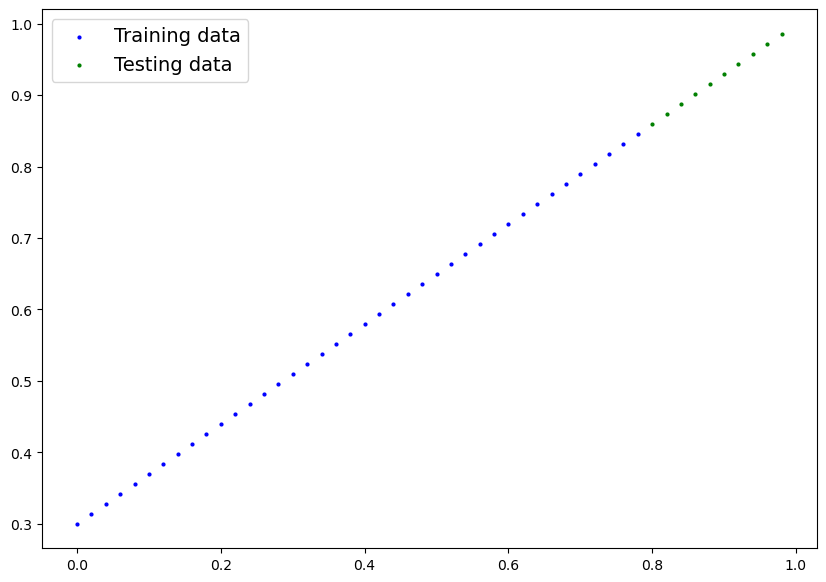

In [443]:
plot_predictions(X_train)

## 2. Build Model

What our model does:
* Start with random values (weight & bias)
* Look at training data & adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used tp creat
the data)

How does it do so? Through 2 main algorithms:
1. Gradient descent
2. Backpropagation 

In [444]:
from torch import nn
# Create Linear Regression Model Class
class LinearRegressionModel(nn.Module): # Almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float64))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float64) )
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor ) -> torch.Tensor: # <- x is the input data
        return self.weights * x + self.bias # this is the linear regression formula

### Pytorch model building essentials

* torch.nn - contain all of  the buildings for computational graphs (aka neural networks)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us 
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the Contents of our Pytorch model

We've created a model, what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [445]:
# Create a random seed 
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
# Check out parameters

list( model_0.parameters() )


[Parameter containing:
 tensor([0.0582], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.0629], dtype=torch.float64, requires_grad=True)]

In [446]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.0582], dtype=torch.float64)),
             ('bias', tensor([0.0629], dtype=torch.float64))])

### Making prediction using `torch.inference_mode()`

To check model's predictive power, let's see how well it predicts `y_test`based on `X_test`

When we pass data through model, it's going to run through the `forward()` method 

In [447]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [448]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[0.1094],
        [0.1106],
        [0.1118],
        [0.1129],
        [0.1141],
        [0.1152],
        [0.1164],
        [0.1176],
        [0.1187],
        [0.1199]], dtype=torch.float64)

In [449]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

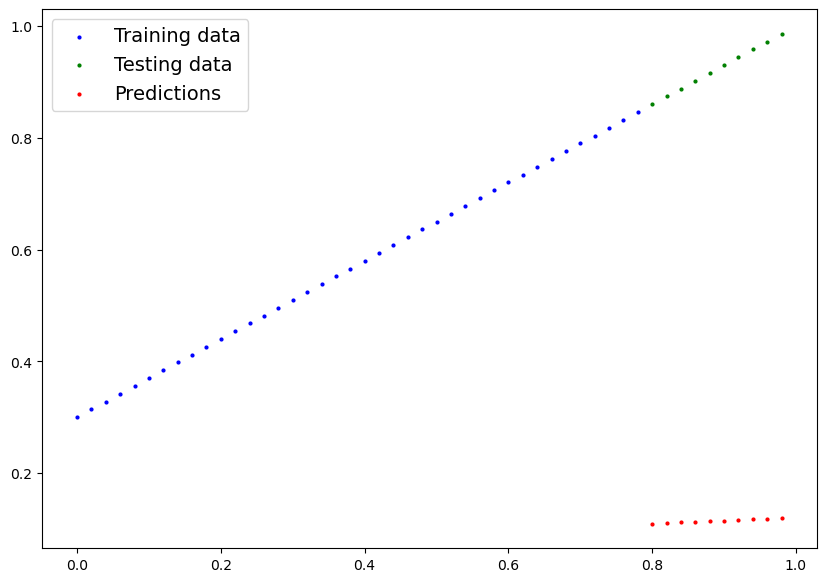

In [450]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters.

Or in another words, from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function 

* Note: loss function = cost function = criterion 

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (weight, bias) to improve the loss function

And specifically for Pytorch, we need:
* A training loop
* A testing loop


In [451]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.0582], dtype=torch.float64)),
             ('bias', tensor([0.0629], dtype=torch.float64))])

In [452]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a Training Loop (and a Testing loop) in Pytorch 

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) aka forward propagation to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss (** **)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)



In [453]:
torch.manual_seed(42)
# An epoch is one loop through the data ... (this is a hyperparameter bc we've set it by ourselves)
epochs = 300

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data 
for epoch in range(epochs):
    # set the model to training mode:
    model_0.train() # sets all parameters that require gradients to require gradients
    
    # 1. Forward pass 
    y_preds = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train) # Calculate predictions on training data set n the ideal training values 
    print(f"Loss: {loss}")
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default hw the optimizer changes will accumulate through the loop so ... we have to zero  them above in step 3 for the next iteration of the loop
    
    ### Testing 
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        # 2. Calculate the loss 
        test_loss = loss_fn(test_pred, y_test)
        
    # Print out results
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}" )
        # Print out model state dict
        print( model_0.state_dict())
    

Loss: 0.4874095809619118
Epoch: 0 | Loss: 0.4874095809619118 | Test loss: 0.7948613474183751
OrderedDict([('weights', tensor([0.0621], dtype=torch.float64)), ('bias', tensor([0.0729], dtype=torch.float64))])
Loss: 0.47588858102554726
Loss: 0.46436758108918263
Loss: 0.4528465811528181
Loss: 0.4413255812164535
Loss: 0.42980458128008897
Loss: 0.41828358134372434
Loss: 0.40676258140735977
Loss: 0.3952415814709952
Loss: 0.3837205815346306
Loss: 0.372199581598266
Epoch: 10 | Loss: 0.372199581598266 | Test loss: 0.6601513477725385
OrderedDict([('weights', tensor([0.1011], dtype=torch.float64)), ('bias', tensor([0.1729], dtype=torch.float64))])
Loss: 0.36067858166190137
Loss: 0.34915758172553674
Loss: 0.3376365817891721
Loss: 0.3261155818528076
Loss: 0.31459458191644296
Loss: 0.3030735819800784
Loss: 0.29155258204371376
Loss: 0.28003158210734924
Loss: 0.2685105821709846
Loss: 0.25698958223462
Epoch: 20 | Loss: 0.25698958223462 | Test loss: 0.5254413481267017
OrderedDict([('weights', tensor([0.

In [457]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values
loss_values, test_loss_values

([tensor(0.4874, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.3722, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.2570, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.1588, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.1140, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0957, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0874, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0826, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0788, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0753, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0718, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0683, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0649, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0614, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0580, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0546, dtype=torch.float64, gr

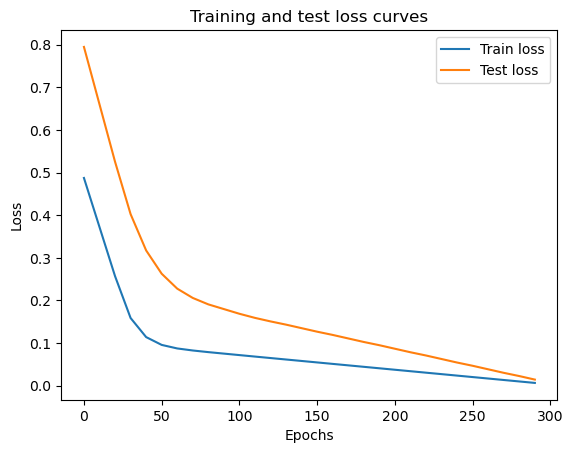

In [459]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [454]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

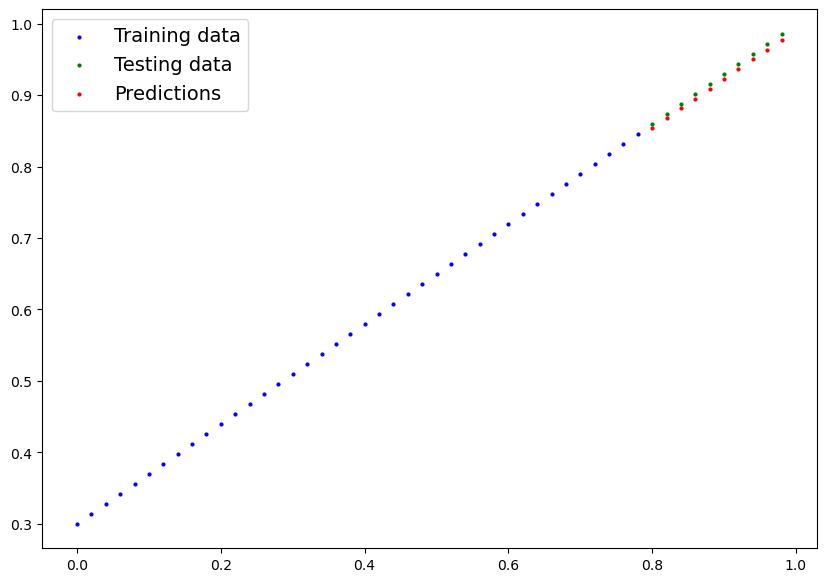

In [455]:
plot_predictions(predictions=y_preds_new)

## Saving a Model in Pytorch

There are three main methods you should about for saving and loading models in Pytorch
1. `torch.save()` - allows you save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you load a saved Python Project
3. `torch.nn.Module.load_state_dict()` - allow to load a model's saved state dictionary



In [461]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models\01_pytorch_workflow_model_0.pth


## Loading a Pytorch model 

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [464]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6848], dtype=torch.float64)),
             ('bias', tensor([0.3064], dtype=torch.float64))])

In [465]:
# To load in a saved state dict we have to instantiate
loaded_model_0 = LinearRegressionModel() 

# Load the saved state dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [472]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8542],
        [0.8679],
        [0.8816],
        [0.8953],
        [0.9090],
        [0.9227],
        [0.9364],
        [0.9501],
        [0.9638],
        [0.9775]], dtype=torch.float64)

In [474]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8542],
        [0.8679],
        [0.8816],
        [0.8953],
        [0.9090],
        [0.9227],
        [0.9364],
        [0.9501],
        [0.9638],
        [0.9775]], dtype=torch.float64)

In [475]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercises

1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [533]:
# Set weight=0.3 and bias=0.9 there should be at least 100 data points total
weight = 0.3
bias = 0.9


X = torch.arange(1, 101, 1).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10]]),
 tensor([[1.2000],
         [1.5000],
         [1.8000],
         [2.1000],
         [2.4000],
         [2.7000],
         [3.0000],
         [3.3000],
         [3.6000],
         [3.9000]]),
 100,
 100)

In [534]:
# Split the data into 80% training, 20% testing.
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [535]:
# Plot the training and testing data so it becomes visual.
def plot_predictions(train_data=X_train, # type: ignore
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    ''' 
    Plots training data, test data & compares predictions
    '''
    plt.figure(figsize=(10,7 ))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    # Show the legend
    plt.legend(prop={'size':14})
    

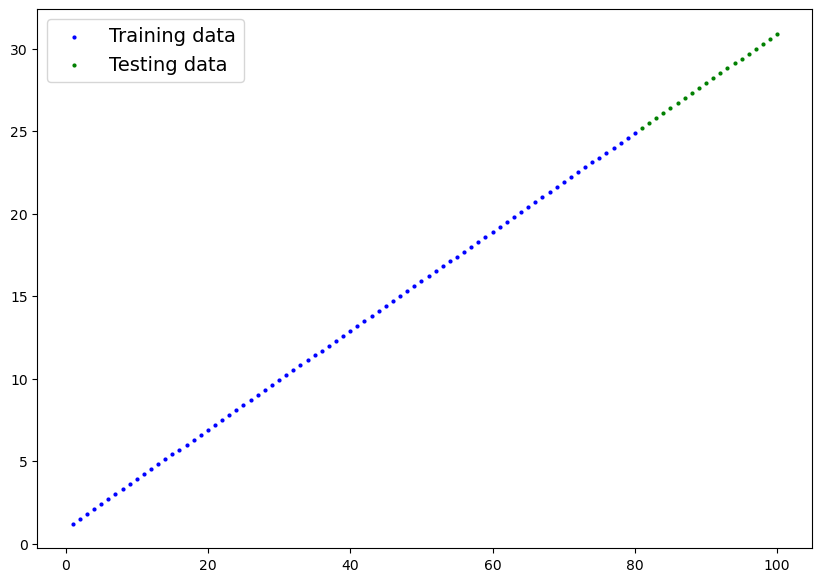

In [536]:
plot_predictions(X_train)

## Build Model

In [537]:
from torch import nn
# Create Linear Regression Model Class
class LinearRegressionModel(nn.Module): # Almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float64))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float64) )
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor ) -> torch.Tensor: # <- x is the input data
        return self.weights * x + self.bias # this is the linear regression formula

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weights', tensor([0.0582], dtype=torch.float64)),
             ('bias', tensor([0.0629], dtype=torch.float64))])

## Create a loss function and optimizer

using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [538]:
loss_fn = nn.L1Loss() # Set up a loss function
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [539]:
torch.manual_seed(42)
# An epoch is one loop through the data ... (this is a hyperparameter bc we've set it by ourselves)
epochs = 800

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data 
for epoch in range(epochs):
    # set the model to training mode:
    model_0.train() # sets all parameters that require gradients to require gradients
    
    # 1. Forward pass 
    y_preds = model_1(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train) # Calculate predictions on training data set n the ideal training values 
    print(f"Loss: {loss}")
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default hw the optimizer changes will accumulate through the loop so ... we have to zero  them above in step 3 for the next iteration of the loop
    
    ### Testing 
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_1(X_test)
        # 2. Calculate the loss 
        test_loss = loss_fn(test_pred, y_test)
        
    # Print out results
    if epoch % 20 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}" )
        # Print out model state dict
        print( model_0.state_dict())
    

Loss: 10.631833374654938
Epoch: 0 | Loss: 10.631833374654938 | Test loss: 13.938390383994511
OrderedDict([('weights', tensor([0.6848], dtype=torch.float64)), ('bias', tensor([0.3064], dtype=torch.float64))])
Loss: 5.822869922181455
Loss: 10.478708374654936
Loss: 5.974649484728063
Loss: 10.376458374654936
Loss: 6.076174484728064
Loss: 10.274208374654936
Loss: 6.1776994847280635
Loss: 10.171958374654935
Loss: 6.279224484728064
Loss: 10.069708374654935
Loss: 6.380749484728064
Loss: 9.967458374654935
Loss: 6.482274484728063
Loss: 9.865208374654937
Loss: 6.583799484728064
Loss: 9.762958374654936
Loss: 6.685324484728065
Loss: 9.660708374654936
Loss: 6.786849484728064
Loss: 9.558458374654936
Epoch: 20 | Loss: 9.558458374654936 | Test loss: 16.324265383994522
OrderedDict([('weights', tensor([0.6848], dtype=torch.float64)), ('bias', tensor([0.3064], dtype=torch.float64))])
Loss: 6.8883744847280655
Loss: 9.456208374654935
Loss: 6.989899484728065
Loss: 9.353958374654933
Loss: 7.091424484728066
Lo

## Make predictions with the trained model on the test data

In [548]:
# Make predictions with the model
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[25.1669],
        [25.4748],
        [25.7827],
        [26.0906],
        [26.3985],
        [26.7064],
        [27.0144],
        [27.3223],
        [27.6302],
        [27.9381],
        [28.2460],
        [28.5539],
        [28.8618],
        [29.1697],
        [29.4776],
        [29.7855],
        [30.0934],
        [30.4013],
        [30.7092],
        [31.0171]], dtype=torch.float64)

In [549]:
y_preds.cpu()

tensor([[25.1669],
        [25.4748],
        [25.7827],
        [26.0906],
        [26.3985],
        [26.7064],
        [27.0144],
        [27.3223],
        [27.6302],
        [27.9381],
        [28.2460],
        [28.5539],
        [28.8618],
        [29.1697],
        [29.4776],
        [29.7855],
        [30.0934],
        [30.4013],
        [30.7092],
        [31.0171]], dtype=torch.float64)

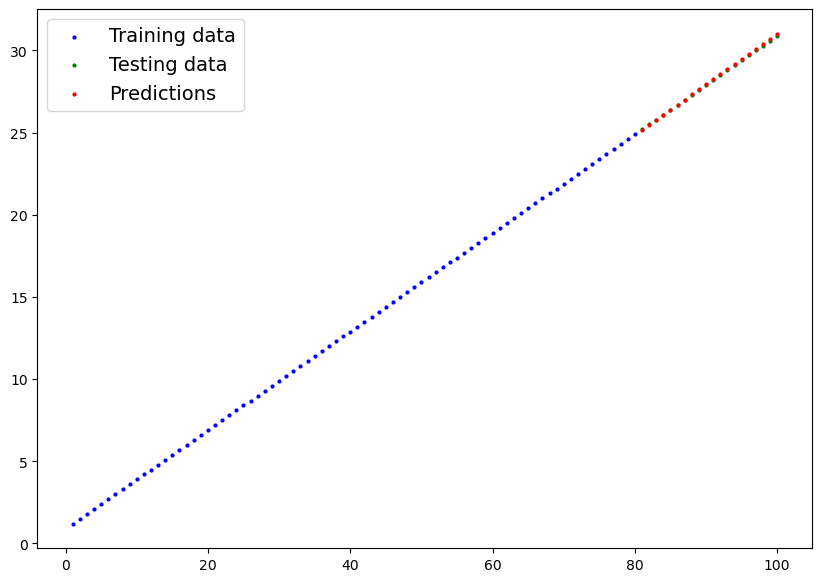

In [550]:
plot_predictions(predictions=y_preds.cpu())

In [551]:

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path 
MODEL_NAME = "02_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models\02_pytorch_model


In [576]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)
y_preds = y_preds.to('cuda')

In [577]:
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')